In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
manuale= pd.read_csv('manuale.csv' ,sep=';' , thousands="." )
df=pd.DataFrame(manuale)
df

,Stagione,Calciatore,Squadra,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni,Ruolo?
0,2024-25,Scott McTominay,Napoli,27,34,2938,12,4,12,12,3,0,Cen
1,2024-25,Alessandro Buongiorno,Napoli,25,22,1924,1,0,1,1,2,0,Dif
2,2024-25,Hakan Çalhanoğlu,Inter,30,29,1947,5,6,2,2,5,0,Cen
3,2024-25,Armando Izzo,Monza,32,30,2435,1,1,1,1,12,0,Dif
4,2024-25,Alex Meret,Napoli,27,34,3005,0,0,0,0,0,0,Por
5,2024-25,Mario Balotelli,Genoa,33,6,62,0,0,0,0,2,0,Att
6,2024-25,Dušan Vlahović,Juventus,24,29,1784,10,4,6,6,3,0,Att
7,2024-25,Romelu Lukaku,Napoli,31,36,2843,14,10,11,11,4,0,Att
8,2024-25,Riccardo Orsolini,Bologna,27,30,1878,15,4,12,12,2,0,Att
9,2024-25,Pedro Rodríguez Ledesma,Lazio,37,30,1102,10,1,8,8,2,0,Att


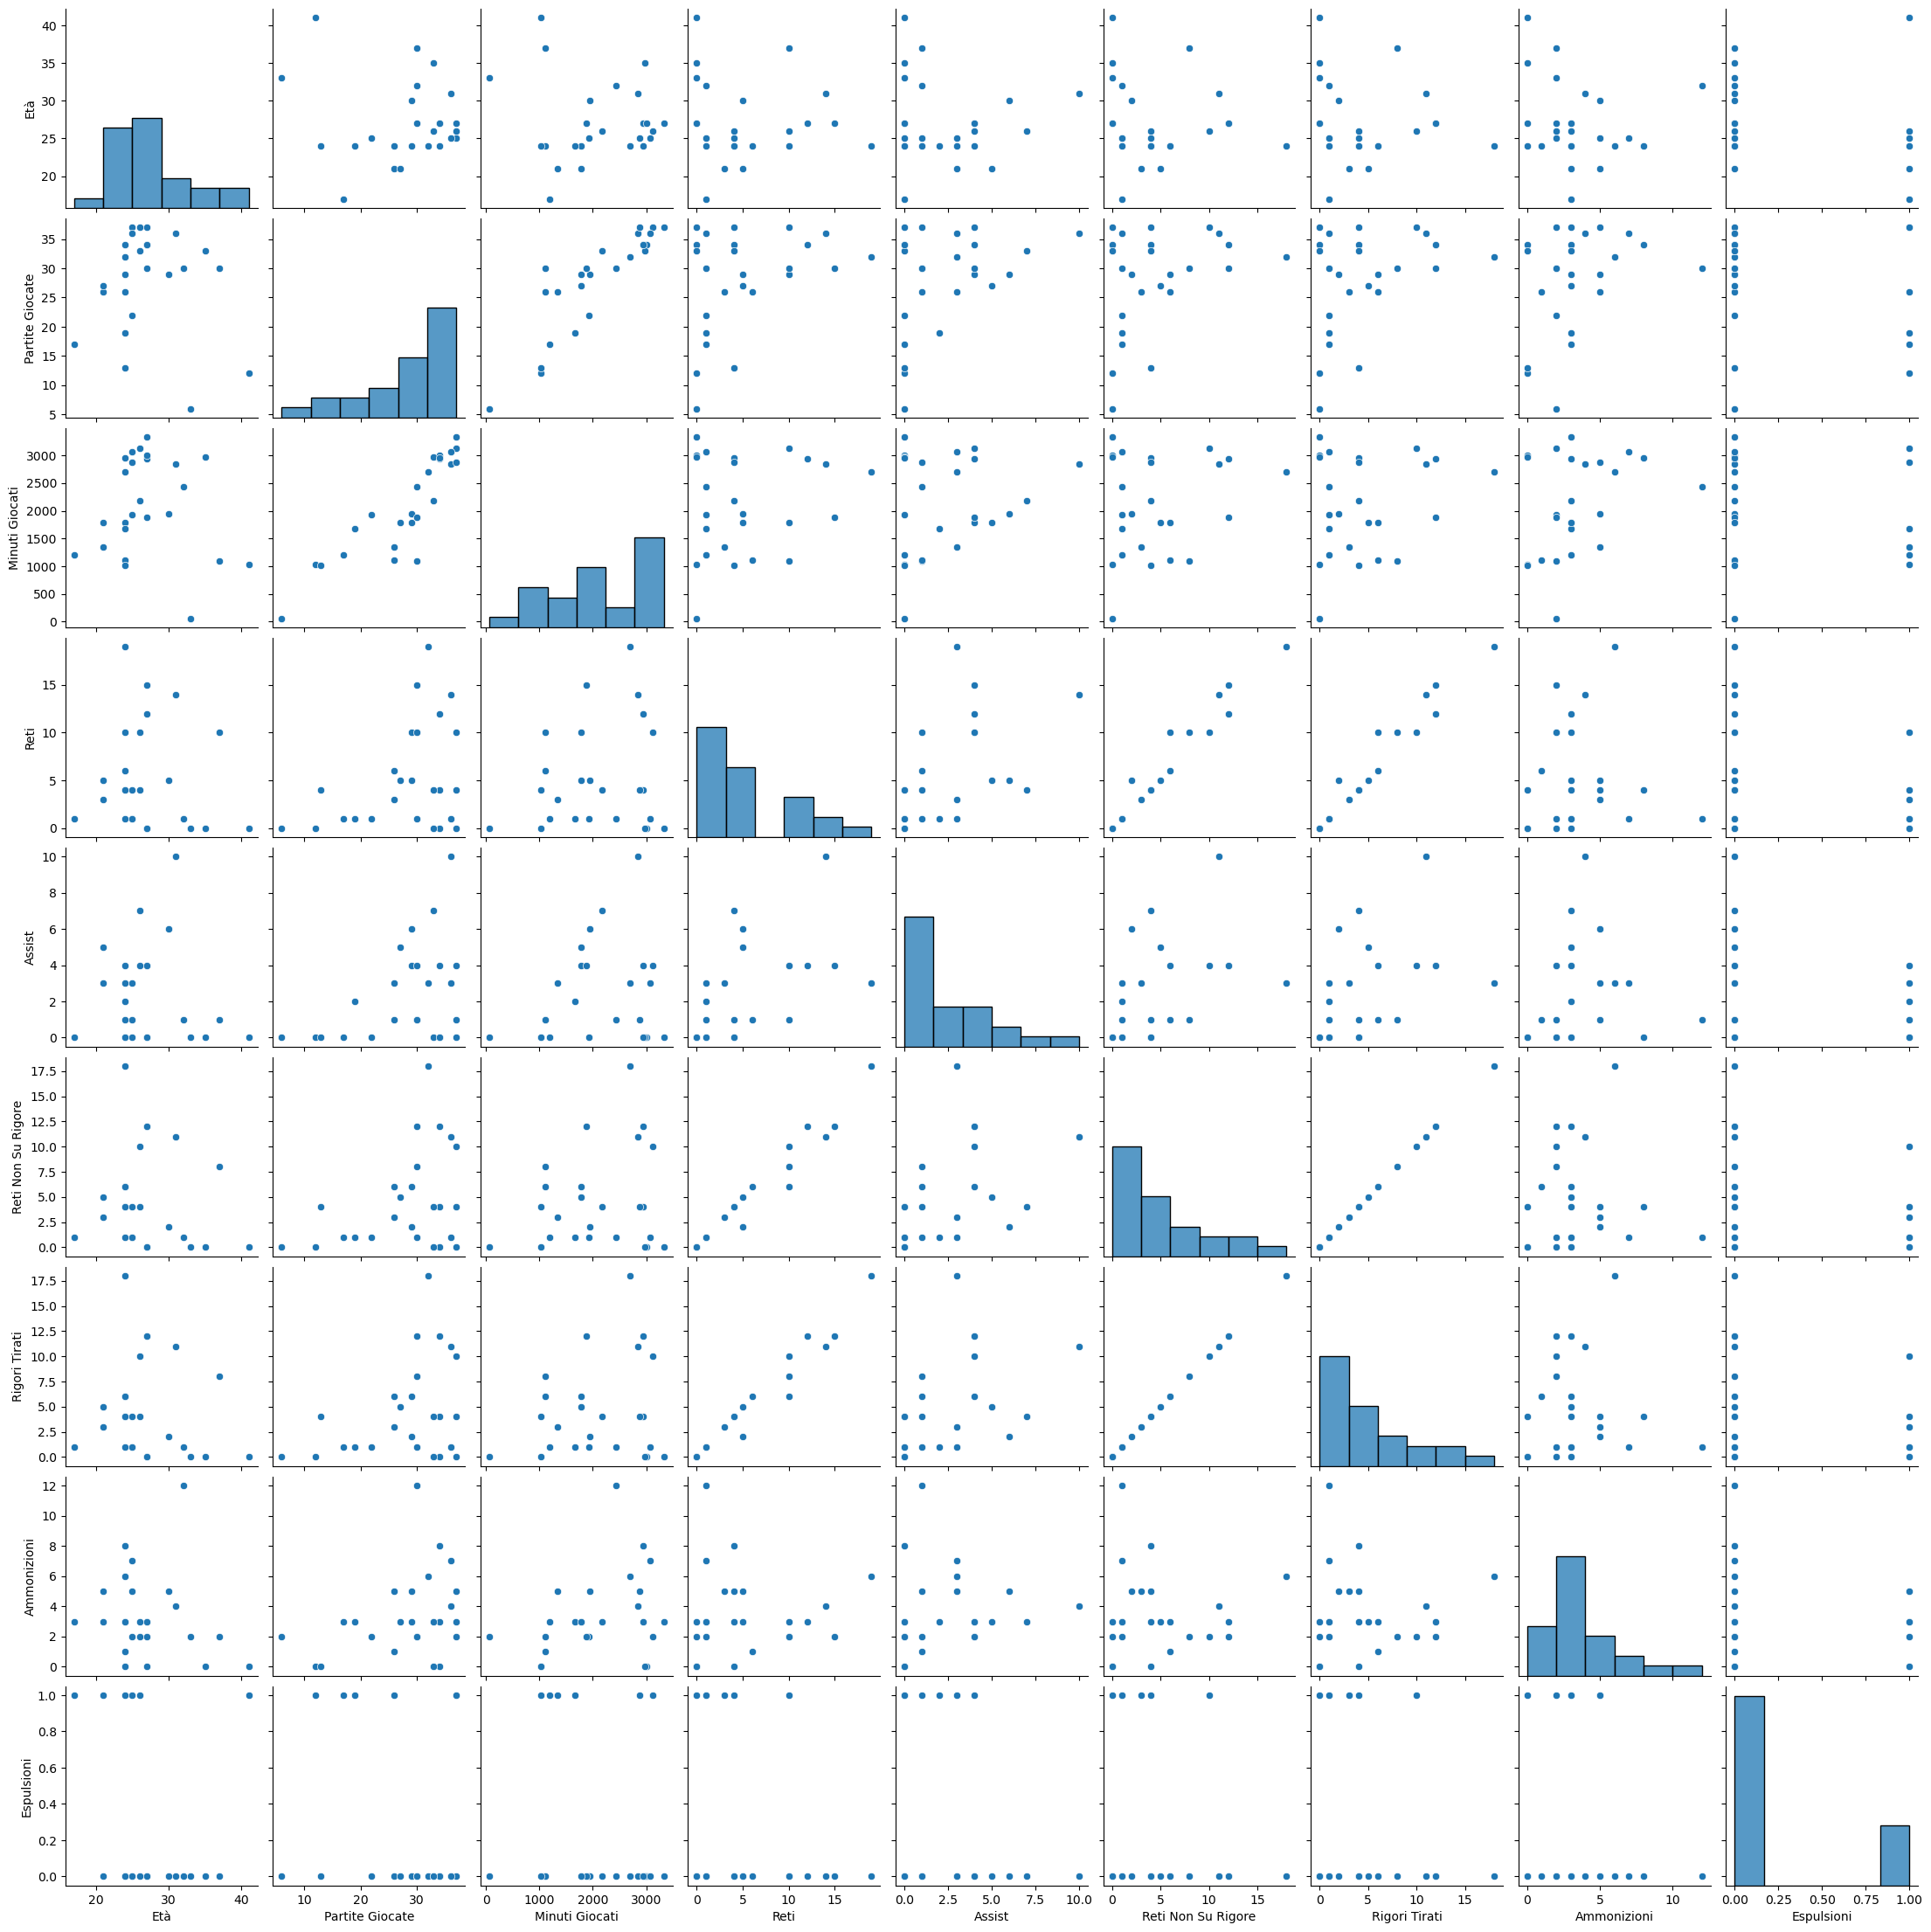

In [3]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df_num = df.select_dtypes(include='number').astype(float).dropna()
sns.pairplot(df_num.select_dtypes(include='number'))
plt.show()

PREVISIONE DEI MINUTI GIOCATI

In [4]:
X = df[['Età', 'Partite Giocate','Reti']]  
y = df['Minuti Giocati']    

In [5]:
X_b = np.c_[np.ones(X.shape[0]), X]  # shape (6, 3)

# Calcolo dei coefficienti beta = (XᵗX)^(-1) Xᵗy
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

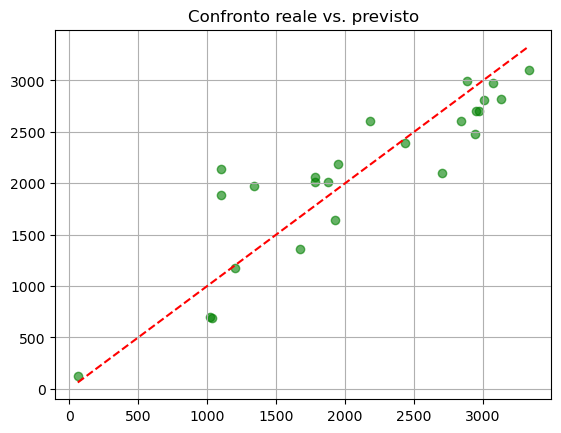

In [6]:
y_pred = X_b @ beta  # previsioni su tutto il dataset
plt.scatter(y, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Confronto reale vs. previsto")
plt.grid(True)
plt.show()

In [7]:
att=df.loc[df['Ruolo?']=='Att']
att

,Stagione,Calciatore,Squadra,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni,Ruolo?
5,2024-25,Mario Balotelli,Genoa,33,6,62,0,0,0,0,2,0,Att
6,2024-25,Dušan Vlahović,Juventus,24,29,1784,10,4,6,6,3,0,Att
7,2024-25,Romelu Lukaku,Napoli,31,36,2843,14,10,11,11,4,0,Att
8,2024-25,Riccardo Orsolini,Bologna,27,30,1878,15,4,12,12,2,0,Att
9,2024-25,Pedro Rodríguez Ledesma,Lazio,37,30,1102,10,1,8,8,2,0,Att
11,2024-25,Giacomo Raspadori,Napoli,24,26,1103,6,1,6,6,1,0,Att
16,2024-25,Moise Kean,Fiorentina,24,32,2704,19,3,18,18,6,0,Att


In [8]:
Natt=df.loc[df['Ruolo?']!='Att']
Natt

,Stagione,Calciatore,Squadra,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni,Ruolo?
0,2024-25,Scott McTominay,Napoli,27,34,2938,12,4,12,12,3,0,Cen
1,2024-25,Alessandro Buongiorno,Napoli,25,22,1924,1,0,1,1,2,0,Dif
2,2024-25,Hakan Çalhanoğlu,Inter,30,29,1947,5,6,2,2,5,0,Cen
3,2024-25,Armando Izzo,Monza,32,30,2435,1,1,1,1,12,0,Dif
4,2024-25,Alex Meret,Napoli,27,34,3005,0,0,0,0,0,0,Por
10,2024-25,Vanja Milinković-Savić,Torino,27,37,3330,0,0,0,0,3,0,Por
12,2024-25,Tijjani Reijnders,Milan,26,37,3128,10,4,10,10,2,1,Cen
13,2024-25,José Manuel Reina,Como,41,12,1034,0,0,0,0,0,1,Por
14,2024-25,Francisco Conceição,Juventus,21,26,1340,3,3,3,3,5,1,Cen
15,2024-25,Elif Elmas,Torino,24,13,1021,4,0,4,4,0,0,Cen


In [41]:
class Percettrone:
    def __init__(self, learning_rate=0.1, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X, dtype=np.int64)   # Forziamo interi
        y = np.array(y, dtype=np.int64)

        # Inizializza pesi e bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features, dtype=float)
        self.bias = 0.0

        # Addestramento
        for _ in range(self.n_epochs):
            for xi, target in zip(X, y):
                # Predizione
                y_pred = self.predict_single(xi)
                # Aggiornamento solo se errore
                update = self.learning_rate * (target - y_pred)
                self.weights += update * xi
                self.bias += update

    def predict_single(self, x):
        activation = np.dot(x, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def predict(self, X):
        X = np.array(X, dtype=np.int64)
        return np.array([self.predict_single(xi) for xi in X], dtype=np.int64)

In [42]:
X = df.select_dtypes(include='number')
Y = df["Ruolo?"].map({"Att": 1, "Dif": 0,"Cen":0,"Por":0})

In [43]:
X

,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni
0,27,34,2938,12,4,12,12,3,0
1,25,22,1924,1,0,1,1,2,0
2,30,29,1947,5,6,2,2,5,0
3,32,30,2435,1,1,1,1,12,0
4,27,34,3005,0,0,0,0,0,0
5,33,6,62,0,0,0,0,2,0
6,24,29,1784,10,4,6,6,3,0
7,31,36,2843,14,10,11,11,4,0
8,27,30,1878,15,4,12,12,2,0
9,37,30,1102,10,1,8,8,2,0


In [44]:
Y

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    0
11    1
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
Name: Ruolo?, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,        # 20% per il test
    random_state=42,      # per riproducibilità
    shuffle=True          # mescola i dati prima di dividere
)

In [62]:
perc = Percettrone(learning_rate=0.1, n_epochs=10000)
perc.fit(X_train, y_train)
y_pred=perc.predict(X_test)

In [63]:
y_pred

array([1, 1, 0, 0, 1], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n\nReport:\n", classification_report(y_test, y_pred))

Accuracy: 1.0


Confusion Matrix:
 [[2 0]
 [0 3]]


Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

